# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [2]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [9]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(1.2641)


## Sampling from categorical probabilities with given probabilities

In [10]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(1)


## Animating data

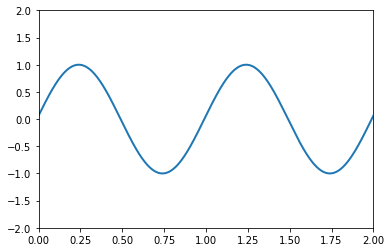

In [11]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

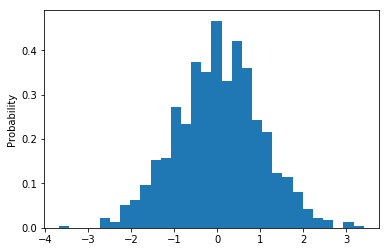

In [12]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

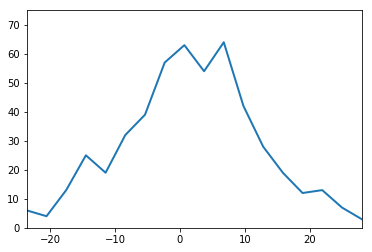

In [3]:
## Insert solution here
def animate_histogram():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim((-10, 10))
    ax.set_ylim((0, 20))

    line, = ax.plot([], [], lw=2)
    
    values = []
    mean = 0
    variance = 10
    
    # animation function. This is called sequentially
    def update(i):
        for j in range(0,5):
            sample = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
            values.append(sample)
        y, x = np.histogram(values, bins='auto')
        x = x[1:]
        
        # set the right and left limits
        left, right = ax.get_xlim()
        if x[0] < left:
            ax.set_xlim(left=x[0])
        if x[-1] > right:
            ax.set_xlim(right=x[-1])
          
        # set the top limit
        bottom, top = ax.get_ylim()
        if max(y) > top:
            ax.set_ylim(top=max(y) + 5)
        
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
      
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, update, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate_histogram()

## Task 2

48936 970 2 92
Probability: 0.08662900188323917


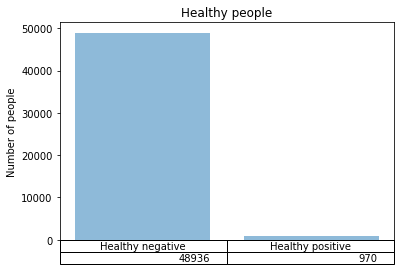

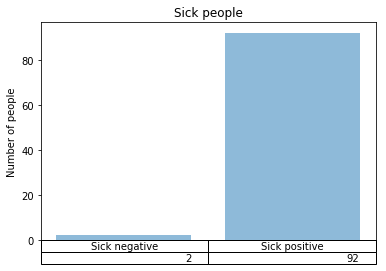

In [4]:
## Insert solution here
def plot_data(healthy_negative, healthy_positive, sick_negative, sick_positive):
    # Data to plot
    labels = 'Healthy negative', 'Healthy positive'
    sizes = [healthy_negative, healthy_positive]

    y_pos = np.arange(len(labels))

    plt.bar(y_pos, sizes, align='center', alpha=0.5)
    plt.xticks([])
    plt.ylabel('Number of people')
    plt.title('Healthy people')

    plt.table(cellText=[[healthy_negative, healthy_positive]], colLabels=labels)
    plt.show()

    # Data to plot
    labels = 'Sick negative', 'Sick positive'
    sizes = [sick_negative, sick_positive]

    y_pos = np.arange(len(labels))

    plt.bar(y_pos, sizes, align='center', alpha=0.5)
    plt.xticks([])
    plt.ylabel('Number of people')
    plt.title('Sick people')

    plt.table(cellText=[[sick_negative, sick_positive]], colLabels=labels)
    plt.show()


prob_sick = 100 / 50000
prob_not_sick = 1 - prob_sick

sick_positive = 0
sick_negative = 0
healthy_positive = 0
healthy_negative = 0

people = []
for i in range(50000):
    person = {}
    person['sick'] = pyro.sample("cat", pyro.distributions.Categorical(probs=torch.tensor([prob_not_sick, prob_sick])))
    if person['sick'] == 0:  # healthy
        person['positive'] = pyro.sample("cat2", pyro.distributions.Categorical(probs=torch.tensor([0.98, 0.02])))
        if person['positive'] == 0:  # negative
            healthy_negative += 1
        else:  # positive
            healthy_positive += 1
    else:  # sick
        person['positive'] = pyro.sample("cat3", pyro.distributions.Categorical(probs=torch.tensor([0.01, 0.99])))
        if person['positive'] == 0:  # negative
            sick_negative += 1
        else:  # positive
            sick_positive += 1
    people.append(person)

print(healthy_negative, healthy_positive, sick_negative, sick_positive)
print("Probability: {}".format(sick_positive / (healthy_positive + sick_positive)))

plot_data(healthy_negative, healthy_positive, sick_negative, sick_positive)

In [5]:
# Bayes theorem
prob_sick = 100/50000
prob_healthy = 1 - prob_sick
prob_positive_sick = 99/100
prob_positive_healthy = 2/100

prob_positive = prob_positive_healthy * prob_healthy + prob_positive_sick * prob_sick

prob_sick_positive = (prob_positive_sick * prob_sick)/(prob_positive)

print("Probability: {}".format(prob_sick_positive))

Probability: 0.09024612579762989
